In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
df_train = pd.read_csv('../Dataset/Train_SU63ISt.csv')

In [3]:
df_train['Datetime'] = pd.to_datetime(df_train['Datetime'])
df_train = df_train.sort_values(by=['Datetime'])

In [4]:
df_train["Is_Weekend"] = df_train.Datetime.dt.day_name().isin(['Saturday', 'Sunday']).astype(int)
df_train["Is_peek_hour"] = df_train.Datetime.dt.hour.isin([10,11,12,13,14,15,16,17,18,19,20]).astype(int)

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose

df_train.set_index('Datetime', inplace=True)

In [6]:
decompose_result_mult = seasonal_decompose(analysis, model="multiplicative", period=24)

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid

decompose_result_mult.plot();

NameError: name 'analysis' is not defined

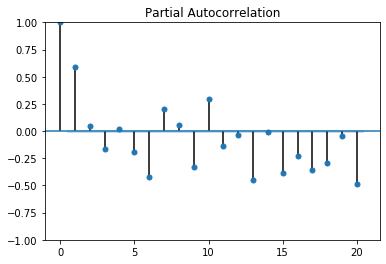

In [18]:
sm.graphics.tsa.plot_pacf(seasonal.diff().dropna().values.squeeze(), lags=20, method="ywm")
plt.show()

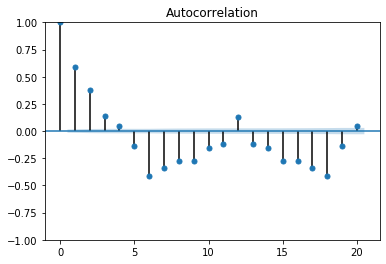

In [17]:
sm.graphics.tsa.plot_acf(seasonal.diff().dropna().values.squeeze(), lags=20)
plt.show()

In [ ]:
SARIMA_model = sm.tsa.statespace.SARIMAX(df_train['Count'], exog=df_train[['Is_Weekend','Is_peek_hour']] ,
                                         order=(2, 1, 1),seasonal_order=(4, 1, 4, 24)).fit()
SARIMA_model.summary()

/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [11]:
# test 
df_test = pd.read_csv('../Dataset/Test_0qrQsBZ.csv')

In [14]:
df_test['Datetime'] = pd.to_datetime(df_test['Datetime'])
df_test = df_test.sort_values(by=['Datetime'])

In [15]:
df_test["Is_Weekend"] = df_test.Datetime.dt.day_name().isin(['Saturday', 'Sunday']).astype(int)
df_test["Is_peek_hour"] = df_test.Datetime.dt.hour.isin([10,11,12,13,14,15,16,17,18,19,20]).astype(int)

In [16]:
df_pred = SARIMA_model.predict(start=18288, end=23399, exog=df_test[['Is_Weekend','Is_peek_hour']])

/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


In [18]:
df_pred = df_pred.reset_index()
df_pred.rename(columns={'predicted_mean': 'Count', 'index':'ID'},
          inplace=True, errors='raise')

In [19]:
final = pd.merge(df_test,df_pred,on='ID')

In [20]:
final[['ID','Count']].to_csv('auto_arima.csv',index=False)